# Connect to BigQuery


In [1]:
#libraries that we need
from google.cloud import bigquery
from google.colab import auth

#authenticate
auth.authenticate_user()

#initialize the client for BigQuerry
project_id = 'churn-project-450223'
client = bigquery.Client(project=project_id, location='US')



In [2]:
#Get the dataset and table
dataset_ref= client.dataset('employeedata',project=project_id)
dataset=client.get_dataset(dataset_ref)
table_ref= dataset.table('tbl_hr_data')
table=client.get_table(table_ref)
table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [3]:
new_table_ref= dataset.table('tbl_new_employees')
new_table=client.get_table(new_table_ref)
new_table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [4]:
#convert to dataframe
df= client.list_rows(table=table).to_dataframe()
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.38,0.53,2,157,3,0,1,0,sales,low,EMP00001
1,0.80,0.86,5,262,6,0,1,0,sales,medium,EMP00002
2,0.11,0.88,7,272,4,0,1,0,sales,medium,EMP00003
3,0.72,0.87,5,223,5,0,1,0,sales,low,EMP00004
4,0.37,0.52,2,159,3,0,1,0,sales,low,EMP00005


In [5]:
df2= client.list_rows(table=new_table).to_dataframe()
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.537849,0.122914,2,208,2,0,0,0,IT,high,NE15043
1,0.056211,0.322600,2,229,5,1,0,0,IT,low,NE15086
2,0.555186,0.555949,2,187,3,0,0,0,RandD,medium,NE15035
3,0.605273,0.713086,2,218,3,0,0,0,RandD,high,NE15069
4,0.043437,0.162372,2,175,3,0,0,0,RandD,high,NE15082


#Build Model

### Install Pycaret

In [6]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 90.3 MB/s eta 0:00:00
   ━━━━

#Code and train Model

In [7]:
#get our model
from pycaret.classification import *

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         14999 non-null  Int64  
 3   average_montly_hours   15004 non-null  Int64  
 4   time_spend_company     14999 non-null  Int64  
 5   Work_accident          15000 non-null  Int64  
 6   Quit_the_Company       15004 non-null  Int64  
 7   promotion_last_5years  15004 non-null  Int64  
 8   Departments            15004 non-null  object 
 9   salary                 15004 non-null  object 
 10  employee_id            15004 non-null  object 
dtypes: Int64(6), float64(2), object(3)
memory usage: 1.3+ MB


In [9]:
#set up our model
setup(df, target='Quit_the_Company',
      ignore_features=['employee_id'], session_id=1230,
      categorical_features=['Departments', 'salary'])

,Description,Value
0,Session id,1230
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9885,0.9906,0.9612,0.9902,0.9754,0.9679,0.9682,1.1580
xgboost,Extreme Gradient Boosting,0.9872,0.9923,0.9624,0.9837,0.9729,0.9646,0.9647,0.2620
lightgbm,Light Gradient Boosting Machine,0.9869,0.9934,0.9569,0.9876,0.9719,0.9634,0.9636,1.7430
et,Extra Trees Classifier,0.9842,0.9909,0.9505,0.9829,0.9662,0.9559,0.9563,1.0930
gbc,Gradient Boosting Classifier,0.9771,0.9886,0.9329,0.9699,0.9508,0.9359,0.9363,1.5240
dt,Decision Tree Classifier,0.9751,0.9708,0.9624,0.9354,0.9486,0.9322,0.9325,0.1330
ada,Ada Boost Classifier,0.9617,0.9828,0.9161,0.9233,0.9194,0.8943,0.8946,0.4170
knn,K Neighbors Classifier,0.9350,0.9675,0.9205,0.8272,0.8710,0.8277,0.8301,0.3250
qda,Quadratic Discriminant Analysis,0.8630,0.9068,0.7950,0.6901,0.7355,0.6442,0.6500,0.1690
lr,Logistic Regression,0.7873,0.8176,0.3328,0.5964,0.4269,0.3091,0.3291,1.2510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1230, verbose=0,
                       warm_start=False)

In [11]:
rf_model= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9886,0.9933,0.9562,0.9959,0.9756,0.9682,0.9685
1,0.9886,0.9844,0.9562,0.9959,0.9756,0.9682,0.9685
2,0.9886,0.9929,0.9641,0.9878,0.9758,0.9683,0.9684
3,0.9876,0.9879,0.9560,0.9917,0.9735,0.9654,0.9657
4,0.9924,0.9972,0.9840,0.9840,0.9840,0.9790,0.9790
5,0.9876,0.9871,0.9600,0.9877,0.9736,0.9655,0.9657
6,0.9905,0.9929,0.9760,0.9839,0.9799,0.9737,0.9737
7,0.9848,0.9913,0.9520,0.9835,0.9675,0.9575,0.9577
8,0.9943,0.9982,0.9840,0.9919,0.9880,0.9842,0.9842


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
final_df= predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7188,0.4959,0.0634,0.2067,0.0970,-0.0167,-0.0209


In [13]:
final_df.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Quit_the_Company,prediction_label,prediction_score
9170,0.94,0.62,5,201,2,0,0,sales,low,0,0,0.9167
12958,0.93,0.86,4,192,4,0,0,IT,high,0,0,0.8745
2931,0.42,0.73,4,208,5,0,0,accounting,low,0,0,0.9183
9555,0.76,0.55,4,147,3,0,0,sales,low,0,0,0.5867
7015,0.63,0.43,2,222,4,0,0,product_mng,high,0,0,0.9000
7187,0.96,0.62,6,193,4,0,0,sales,medium,0,0,0.9315
11429,0.78,0.57,4,157,3,0,0,accounting,low,0,0,0.8477
9456,0.53,0.69,4,135,3,0,0,product_mng,low,0,1,0.7550
1175,0.78,0.71,4,296,3,0,0,hr,low,1,1,0.5950
3192,0.49,0.76,5,237,3,0,0,IT,high,0,1,0.7583


In [14]:
new_predictions= predict_model(rf_model, data=df2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9800,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [15]:
new_predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,employee_id,Quit_the_Company,prediction_label,prediction_score
0,0.537849,0.122914,2,208,2,0,0,IT,high,NE15043,0,0,0.7067
1,0.056211,0.322600,2,229,5,1,0,IT,low,NE15086,0,0,0.5933
2,0.555186,0.555949,2,187,3,0,0,RandD,medium,NE15035,0,0,0.8983
3,0.605273,0.713086,2,218,3,0,0,RandD,high,NE15069,0,0,0.7550
4,0.043437,0.162372,2,175,3,0,0,RandD,high,NE15082,0,0,0.7100


In [16]:
#Write back to bigQuerry
new_predictions.to_gbq('employeedata.pilot_predictions',
                       project_id,
                       chunksize=None,
                       if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 7096.96it/s]


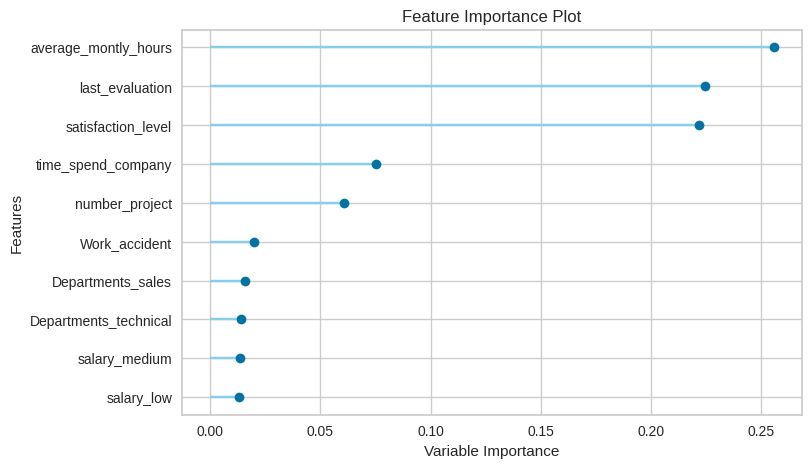

In [17]:
plot_model(rf_model, plot='feature')

In [18]:
#create a feature table
rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_sales',
       'Departments_accounting', 'Departments_hr',
       'Departments_technical', 'Departments_support', 'Departments_IT',
       'Departments_product_mng', 'Departments_marketing',
       'Departments_management', 'Departments_RandD', 'salary_low',
       'salary_medium', 'salary_high'], dtype=object)

In [19]:
rf_model.feature_importances_

array([0.22177478, 0.22460945, 0.0607922 , 0.25565849, 0.07507207,
       0.01996066, 0.00616994, 0.01603935, 0.0088097 , 0.00812249,
       0.01399408, 0.01284492, 0.01046225, 0.00733181, 0.00836029,
       0.00632338, 0.00908829, 0.01300855, 0.01342759, 0.00814972])

In [20]:
import pandas as pd
feature_table= pd.DataFrame(zip(rf_model.feature_names_in_, rf_model.feature_importances_),
                            columns=['feature', 'importance'])

feature_table.sort_values(by='importance', ascending=False)

,feature,importance
3,average_montly_hours,0.255658
1,last_evaluation,0.224609
0,satisfaction_level,0.221775
4,time_spend_company,0.075072
2,number_project,0.060792
5,Work_accident,0.019961
7,Departments_sales,0.016039
10,Departments_technical,0.013994
18,salary_medium,0.013428
17,salary_low,0.013009


In [21]:
feature_table.to_gbq('employeedata.feature_table',
                     project_id,
                     chunksize=None
                     ,if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 7973.96it/s]
